# Импорт необходимых библиотек

In [ ]:
# based on https://www.kaggle.com/konstanter/fasterrcnn-pytorch-maskdetection

# Загрузка необходимых библиотек и модулей

import zipfile # Библиотека для работы с zip архивами

import os      # Библиотека для работы с фаловой системой

import time    # Библиотека для работы со временем

from google.colab import drive # Модуль для работы с Google Disk

from PIL import Image          # Модуль Image для работы с изображениями

import numpy as np

import pandas as pd

import torchvision

from torchvision import transforms, datasets, models

import torch

from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

from PIL import Image

import matplotlib.pyplot as plt

import matplotlib.patches as patches

import albumentations as A

from albumentations.pytorch.transforms import ToTensorV2

import cv2

import os

import glob

from xml.etree import ElementTree as et

pd.options.mode.chained_assignment = None  # default='warn'

from matplotlib.patches import Rectangle

import seaborn as sns

import gc

import shutil

from PIL import Image



# Импорт модели глубокого обучения Keypoint RCNN

In [ ]:
from torchvision.models.detection import (
    keypointrcnn_resnet50_fpn,
    KeypointRCNN_ResNet50_FPN_Weights,
)

In [ ]:
model = keypointrcnn_resnet50_fpn(weights=KeypointRCNN_ResNet50_FPN_Weights.COCO_V1)

In [ ]:
# model = torchvision.models.detection.keypointrcnn_resnet50_fpn(pretrained=True)



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=KeypointRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=KeypointRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/keypointrcnn_resnet50_fpn_coco-fc266e95.pth" to /root/.cache/torch/hub/checkpoints/keypointrcnn_resnet50_fpn_coco-fc266e95.pth
100%|██████████| 226M/226M [00:08<00:00, 28.0MB/s]


# Cписок опорных точек:

In [ ]:
keypoints = ['nose','left_eye','right_eye',\
'left_ear','right_ear','left_shoulder',\
'right_shoulder','left_elbow','right_elbow',\
'left_wrist','right_wrist','left_hip',\
'right_hip','left_knee', 'right_knee', \
'left_ankle','right_ankle']

In [ ]:
len(keypoints)

17

# Открытие первого изображения

In [ ]:
orig_img = Image.open('/content/dspr_cv_u1_diploma_spr1_3_1.png').convert('RGB')

In [ ]:
np.array(orig_img).shape

(886, 1300, 3)

# Препроцессинг - преобразование в тензор изображения, подача на вход модели полученного тензора с получением результата работы модели


In [ ]:
preprocess = transforms.Compose([transforms.ToTensor()])

x = preprocess(orig_img)

# torch.unsqueeze(x, 0).shape

model.eval()

model_rez = model(torch.unsqueeze(x, 0))

# Функция для расшифровки данных, полученных моделью на основе порога ключевых точек и порога вероятности

In [ ]:
def draw_keypoints_per_person(
    img, all_keypoints, all_scores, confs, keypoint_threshold=2, conf_threshold=0.9
):

    # создаём спектр цветов

    cmap = plt.get_cmap("rainbow")

    # создаём копию изображений

    img_copy = img.copy()

    color_id = np.arange(1, 255, 255 // len(all_keypoints)).tolist()[::-1]

    keypoints_name_coord = {}

    # для каждого задетектированного человека

    for person_id in range(len(all_keypoints)):

        # проверяем степень уверенности детектора

        if confs[person_id] > conf_threshold:

            # собираем ключевые точки конкретного человека

            keypoints = all_keypoints[person_id, ...]

            # собираем скоры для ключевых точек

            scores = all_scores[person_id, ...]

            # итерируем по каждому скору

            for kp in range(len(scores)):

                # проверяем степень уверенности детектора опорной точки

                if scores[kp] > keypoint_threshold:

                    # конвертируем массив ключевых точек в список целых чисел

                    keypoint = tuple(

                        map(int, keypoints[kp, :2].detach().numpy().tolist())

                    )

                    # выбираем цвет

                    color = tuple(np.asarray(cmap(color_id[person_id])[:-1]) * 255)

                    # рисуем кружок радиуса 5 вокруг точки

                    cv2.circle(img_copy, keypoint, 5, color, -1)

                    print(keypoint, kp)

                    keypoints_name_coord[kp] = keypoint

                    plt.imshow(img_copy, interpolation='nearest')

                    plt.show()


    print(keypoints_name_coord)

    return img_copy

In [ ]:
model_rez

[{'boxes': tensor([[589.0520, 164.7326, 804.7424, 745.0168],
          [496.4900, 396.0956, 524.9801, 433.9450]], grad_fn=<StackBackward0>),
  'labels': tensor([1, 1]),
  'scores': tensor([0.9997, 0.1649], grad_fn=<IndexBackward0>),
  'keypoints': tensor([[[724.5498, 228.4089,   1.0000],
           [736.7170, 218.4422,   1.0000],
           [715.7010, 217.3347,   1.0000],
           [751.0963, 226.1940,   1.0000],
           [700.2155, 218.4422,   1.0000],
           [762.1574, 287.1017,   1.0000],
           [665.9263, 285.9943,   1.0000],
           [795.3405, 319.2167,   1.0000],
           [639.3798, 363.5132,   1.0000],
           [778.7490, 381.2318,   1.0000],
           [700.2155, 334.7205,   1.0000],
           [720.1254, 447.6766,   1.0000],
           [661.5018, 445.4617,   1.0000],
           [676.9873, 567.2771,   1.0000],
           [685.8362, 567.2771,   1.0000],
           [631.6370, 682.4481,   1.0000],
           [748.8842, 578.3513,   1.0000]],
  
          [[515.666

# Применение полученной функции к изображению

In [ ]:
img_with_points = draw_keypoints_per_person(
    np.array(orig_img), model_rez[0]['keypoints'], model_rez[0]['keypoints_scores'], model_rez[0]['scores'], keypoint_threshold=2, conf_threshold=0.9
)

In [ ]:
img_with_points.shape

(886, 1300, 3)

# Вывод изображения на экран монитора

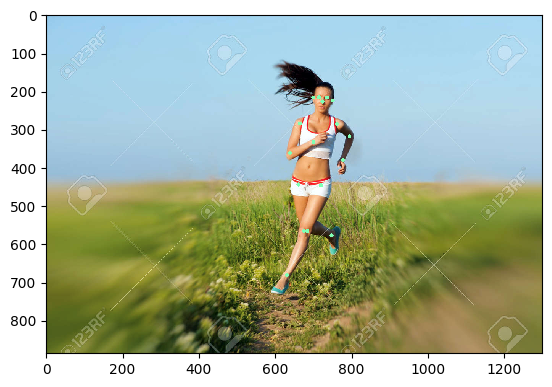

In [ ]:
plt.imshow(img_with_points, interpolation='nearest')

plt.show()

# Ключевые точки формируют конечности

In [ ]:
def get_limbs_from_keypoints(keypoints):
    limbs = [
        [keypoints.index("right_eye"), keypoints.index("nose")],
        [keypoints.index("right_eye"), keypoints.index("right_ear")],
        [keypoints.index("left_eye"), keypoints.index("nose")],
        [keypoints.index("left_eye"), keypoints.index("left_ear")],
        [keypoints.index("right_shoulder"), keypoints.index("right_elbow")],
        [keypoints.index("right_elbow"), keypoints.index("right_wrist")],
        [keypoints.index("left_shoulder"), keypoints.index("left_elbow")],
        [keypoints.index("left_elbow"), keypoints.index("left_wrist")],
        [keypoints.index("right_hip"), keypoints.index("right_knee")],
        [keypoints.index("right_knee"), keypoints.index("right_ankle")],
        [keypoints.index("left_hip"), keypoints.index("left_knee")],
        [keypoints.index("left_knee"), keypoints.index("left_ankle")],
        [keypoints.index("right_shoulder"), keypoints.index("left_shoulder")],
        [keypoints.index("right_hip"), keypoints.index("left_hip")],
        [keypoints.index("right_shoulder"), keypoints.index("right_hip")],
        [keypoints.index("left_shoulder"), keypoints.index("left_hip")],
    ]
    return limbs


limbs = get_limbs_from_keypoints(keypoints)

In [ ]:
limbs

[[2, 0],
 [2, 4],
 [1, 0],
 [1, 3],
 [6, 8],
 [8, 10],
 [5, 7],
 [7, 9],
 [12, 14],
 [14, 16],
 [11, 13],
 [13, 15],
 [6, 5],
 [12, 11],
 [6, 12],
 [5, 11]]

# Функция для постороения конечностей

In [ ]:
from torch._C import qscheme
def draw_keypoints_per_person_with_limbs(
    img, all_keypoints, all_scores, confs, limbs, keypoint_threshold=2, conf_threshold=0.9
):

    # создаём спектр цветов

    cmap = plt.get_cmap("rainbow")

    # создаём копию изображений

    img_copy = img.copy()

    color_id = np.arange(1, 255, 255 // len(all_keypoints)).tolist()[::-1]

    keypoints_name_coord = {}

    conf1 = []

    # для каждого задетектированного человека

    for person_id in range(len(all_keypoints)):

        # проверяем степень уверенности детектора

        if confs[person_id] > conf_threshold:

            # собираем ключевые точки конкретного человека

            print(confs[person_id])

            keypoints = all_keypoints[person_id, ...]

            # собираем скоры для ключевых точек

            scores = all_scores[person_id, ...]

            # итерируем по каждому скору

            for kp in range(len(scores)):

                # проверяем степень уверенности детектора опорной точки

                if scores[kp] > keypoint_threshold:

                    # конвертируем массив ключевых точек в список целых чисел

                    keypoint = tuple(

                        map(int, keypoints[kp, :2].detach().numpy().tolist())

                    )

                    # выбираем цвет

                    color = tuple(np.asarray(cmap(color_id[person_id])[:-1]) * 255)

                    # рисуем кружок радиуса 5 вокруг точки

                    cv2.circle(img_copy, keypoint, 5, color, -1)

                    # print(keypoint, kp)

                    keypoints_name_coord[kp] = keypoint

                    # print(keypoint)

                    # conf1.append(scores[kp])

                    # plt.imshow(img_copy, interpolation='nearest')

                    # plt.show()


    # print(scores)

    # print(keypoints_name_coord)

    for limb_index in range(len(limbs)):

      # print(limbs[limb_index][1])

      if limbs[limb_index][1] not in keypoints_name_coord:

        keypoints_name_coord[limbs[limb_index][1]] = keypoints_name_coord[0]

      if limbs[limb_index][0] not in keypoints_name_coord:

        keypoints_name_coord[limbs[limb_index][0]] = keypoints_name_coord[0]

    # print(keypoints_name_coord)

    sorted_keypoints_name_coord = dict(sorted(keypoints_name_coord.items()))

    # print(sorted_keypoints_name_coord.values())

    for limb in limbs:

      cv2.line(img_copy, keypoints_name_coord[limb[0]], keypoints_name_coord[limb[1]], (0, 255, 0), thickness=4)

    # conf1 = model_rez[1][0]['keypoints_scores'][0].detach().numpy()

    conf1 = model_rez[0]['keypoints_scores'][0]

    return img_copy, list(sorted_keypoints_name_coord.values()), conf1

In [ ]:
model_rez[0]['keypoints_scores'][0]

tensor([15.7722, 14.4892, 16.6009, 12.0412, 15.8139,  8.1841, 11.0763,  7.8514,
        12.0230,  9.6195, 15.9702, 13.3827, 13.2999, 16.4980,  6.9198,  7.7075,
         8.2284], grad_fn=<SelectBackward0>)

# Проверка работы функции на заданном результате работы модели

In [ ]:
img_with_points, kpnts, conf1 = draw_keypoints_per_person_with_limbs(
    np.array(orig_img), model_rez[0]['keypoints'], model_rez[0]['keypoints_scores'], model_rez[0]['scores'], limbs, keypoint_threshold=2, conf_threshold=0.9
)

tensor(0.9997, grad_fn=<SelectBackward0>)


In [ ]:
img_with_points.shape

(886, 1300, 3)

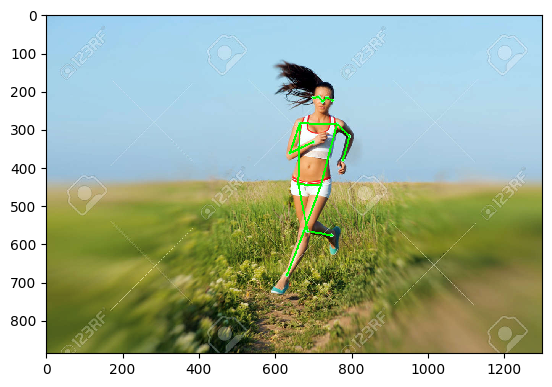

In [ ]:
plt.imshow(img_with_points, interpolation='nearest')

plt.show()

# Извлекаем модельное изображение, с которым сравнивается входное изображение

In [ ]:
orig_img1 = Image.open('/content/831672-Blonde-girl-Workout-Run.jpg').convert('RGB')

# Препроцессинг и работа модели

In [ ]:
preprocess = transforms.Compose([transforms.ToTensor()])

x1 = preprocess(orig_img1)

model.eval()

model_rez1 = model(torch.unsqueeze(x1, 0))

In [ ]:
img_with_points, kpnts1, conf11  = draw_keypoints_per_person_with_limbs(
    np.array(orig_img1), model_rez1[0]['keypoints'], model_rez1[0]['keypoints_scores'], model_rez1[0]['scores'], limbs, keypoint_threshold=2, conf_threshold=0.9
)

tensor(0.9997, grad_fn=<SelectBackward0>)


# Вывод на экран изображения с прориосванными конечностями

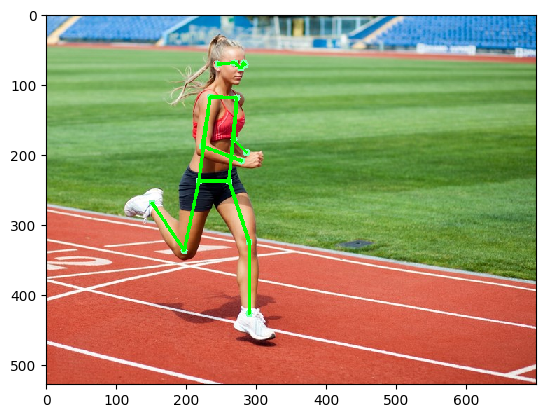

In [ ]:
plt.imshow(img_with_points, interpolation='nearest')

plt.show()

# Предобработка изображений как набора ключевых точек (их координат)

In [ ]:
# Соберём два набора ключевых точек

input_key_points = np.array([(724, 228), (736, 218), (715, 217), (751, 226), (700, 218), (762, 287), (665, 285), (795, 319), (639, 363), (778, 381), (700, 334), (720, 447), (661, 445), (676, 567), (685, 567), (631, 682), (748, 578)])

model_key_points = np.array([(278, 77), (282, 69), (269, 69), (284, 72), (245, 71), (272, 119), (234, 118), (268, 179), (223, 188), (286, 197), (279, 209), (261, 238), (218, 238), (290, 325), (197, 337), (290, 427), (151, 269)])

In [ ]:
# С помощью расширенной матрицы можно осуществить умножение вектора x на матрицу A и добавление вектора b за счёт единственного матричного умножения.

# Расширенная матрица создаётся путём дополнения векторов "1" в конце.

pad = lambda x: np.hstack([x, np.ones((x.shape[0], 1))])

unpad = lambda x: x[:, :-1]

# Расширим наборы ключевых точек до [[ x y 1] , [x y 1]]

Y = pad(model_key_points)

X = pad(input_key_points)

In [ ]:
# Решим задачу наименьших квадратов X * A = Y

# и найдём матрицу аффинного преобразования A.

A, res, rank, s = np.linalg.lstsq(X, Y)

A[np.abs(A) < 1e-10] = 0  # превратим в "0" слишком маленькие значения

# Теперь, когда мы нашли расширенную матрицу A,

# мы можем преобразовать входной набор ключевых точек

transform = lambda x: unpad(np.dot(pad(x), A))

input_transform = transform(input_key_points)

<ipython-input-44-2a8dfcb3bc37>:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  A, res, rank, s = np.linalg.lstsq(X, Y)


In [ ]:
input_transform

array([[266.70472338,  85.54832553],
       [267.90893678,  77.25189679],
       [267.286567  ,  78.95335075],
       [267.76865892,  81.08431085],
       [266.70441064,  81.35637815],
       [263.24020996, 122.09260036],
       [260.15522213, 131.7662437 ],
       [261.77570391, 140.50061764],
       [253.02418999, 188.77108403],
       [256.23013081, 185.39410837],
       [257.39303622, 161.72429034],
       [248.9916544 , 237.73345463],
       [247.17811083, 243.07458986],
       [237.88699949, 325.88926247],
       [238.18813103, 324.86314213],
       [227.15023787, 410.69494953],
       [239.41307661, 325.30139487]])

In [ ]:
import math

# Функции для расчета косинусной близости и взвешенной дистанции

In [ ]:
def cosine_distance(pose1, pose2):

    cossim = pose1.dot(np.transpose(pose2)) / (
        np.linalg.norm(pose1) * np.linalg.norm(pose2)
    )

    dist = cossim

    return dist


def weight_distance(pose1, pose2, conf1):

    # D(U,V) = (1 / sum(conf1)) * sum(conf1 * ||pose1 - pose2||) = sum1 * sum2

    sum1 = 1 / np.sum(conf1)

    sum2 = 0

    for i in range(len(pose1)):

        # каждый индекс i имеет x и y, у которых одинаковая оценка достоверности

        conf_ind = math.floor(i / 2)

        sum2 = conf1[conf_ind] * abs(pose1[i] - pose2[i])

    weighted_dist = sum1 * sum2

    return weighted_dist

In [ ]:
conf1 = [15.7722, 14.4892, 16.6009, 12.0412, 15.8139,  8.1841, 11.0763,  7.8514,
        12.0230,  9.6195, 15.9702, 13.3827, 13.2999, 16.4980,  6.9198,  7.7075,
         8.2284]

# Расчет косинусной близости и взвешенной дистанции между двумя изображениями

In [ ]:
cossim = cosine_distance(model_key_points, input_transform)

In [ ]:
weight_distance(model_key_points, input_transform, conf1)

array([5.17325157, 3.29432354])

# Для косинусной близости усредняем диагональ и получаем число - меру близости двух поз на двух разных зображениях

In [ ]:
cossim.diagonal().mean()

0.058370739320876344